# Lab 6 (2/17): Joining datasets and AirBnB data

### Web pages
Course page: https://ambujtewari.github.io/teaching/STATS306-Winter2020/

Lab page: https://rogerfan.github.io/stats306_w20/

### Office Hours
    Mondays: 2-4pm, USB 2165
    
### Contact
    Questions on problems: Use the slack discussions
    If you need to email me, include in the subject line: [STATS 306]
    Email: rogerfan@umich.edu

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Joining datasets

There are many situations where you may want to combine the information from two datasets together. In `dplyr` we do this with various join commands.

There are four commonly used join commands:

* `left_join`
* `right_join`
* `inner_join`
* `full_join`

While two additional joins are often used as diagnostics:

* `semi_join`
* `anti_join`

You can find the documentation for all of these at https://dplyr.tidyverse.org/reference/join.html.

All the join functions use the same syntax:
```
left_join(data1, data2, by='varname')
data1 %>% left_join(data2, by='varname')

data1 %>% left_join(data2, by=c('var1', 'var2')
```


In [2]:
students = tribble(
    ~name, ~school, ~grade,
    "Albert", 'Ohio',      2.8,
    "Julie",  'Michigan',  3.4,
    "Arnold", 'Wisconsin', 3.1,
    "Jacob",  'Michigan',  2.9,
    "Nat",    'Illinois',  3.9
)

schools = tribble(
    ~school, ~size,
    'Ohio',      44853,
    'Michigan',  29550,
    'Illinois',  32884,
    'Minnesota', 31535
)

students
schools

name,school,grade
<chr>,<chr>,<dbl>
Albert,Ohio,2.8
Julie,Michigan,3.4
Arnold,Wisconsin,3.1
Jacob,Michigan,2.9
Nat,Illinois,3.9


school,size
<chr>,<dbl>
Ohio,44853
Michigan,29550
Illinois,32884
Minnesota,31535


In [3]:
students %>% left_join(schools)

Joining, by = "school"



name,school,grade,size
<chr>,<chr>,<dbl>,<dbl>
Albert,Ohio,2.8,44853
Julie,Michigan,3.4,29550
Arnold,Wisconsin,3.1,NA
Jacob,Michigan,2.9,29550
Nat,Illinois,3.9,32884


In [4]:
students %>% right_join(schools)

Joining, by = "school"



name,school,grade,size
<chr>,<chr>,<dbl>,<dbl>
Albert,Ohio,2.8,44853
Julie,Michigan,3.4,29550
Jacob,Michigan,2.9,29550
Nat,Illinois,3.9,32884
NA,Minnesota,NA,31535


In [5]:
students %>% inner_join(schools)

Joining, by = "school"



name,school,grade,size
<chr>,<chr>,<dbl>,<dbl>
Albert,Ohio,2.8,44853
Julie,Michigan,3.4,29550
Jacob,Michigan,2.9,29550
Nat,Illinois,3.9,32884


In [6]:
students %>% full_join(schools)

Joining, by = "school"



name,school,grade,size
<chr>,<chr>,<dbl>,<dbl>
Albert,Ohio,2.8,44853
Julie,Michigan,3.4,29550
Arnold,Wisconsin,3.1,NA
Jacob,Michigan,2.9,29550
Nat,Illinois,3.9,32884
NA,Minnesota,NA,31535


In [7]:
students %>% semi_join(schools)

Joining, by = "school"



name,school,grade
<chr>,<chr>,<dbl>
Albert,Ohio,2.8
Julie,Michigan,3.4
Jacob,Michigan,2.9
Nat,Illinois,3.9


In [8]:
students %>% anti_join(schools)

Joining, by = "school"



name,school,grade
<chr>,<chr>,<dbl>
Arnold,Wisconsin,3.1


## AirBnB Data

In [9]:
load(url("https://raw.githubusercontent.com/rogerfan/stats306_w20/master/labs/airbnb_dat.Rdata"))

demo = demo %>% mutate(median_household_income = as.numeric(median_household_income),
                       mean_household_income = as.numeric(mean_household_income))

Warning message:
“NAs introduced by coercion”
Warning message:
“NAs introduced by coercion”


`airbnb_dat.Rdata` contains two dataframes: `listing` and `demo`. Let's take a look.
`listing` basically has all the info you would find on a rental page:

In [10]:
glimpse(listing)
head(listing)

Observations: 23,624
Variables: 29
$ accommodates                <dbl> 2, 2, 6, 1, 2, 2, 2, 2, 3, 1, 2, 4, 3, 4,…
$ amenities                   <chr> "{}", "{\"Wireless Internet\",\"Air condi…
$ availability_30             <int> 29, 18, 3, 0, 6, 22, 10, 0, 3, 20, 17, 27…
$ bathrooms                   <dbl> 1.0, 1.0, 1.0, 1.0, 1.0, NA, 1.5, 1.0, 2.…
$ bed_type                    <chr> "Real Bed", "Real Bed", "Real Bed", "Real…
$ bedrooms                    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ beds                        <dbl> 1, 1, 3, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2,…
$ cancellation_policy         <chr> "flexible", "flexible", "flexible", "flex…
$ city                        <chr> "palmdale", "acton", "acton", "los angele…
$ has_availability            <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ host_id                     <int> 44800067, 84615808, 71743973, 41646908, 8…
$ id                          <int> 8909380, 14078522, 13006928, 7898757, 160…
$ instant_bookabl

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,⋯,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
,<dbl>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,2,{},29,1,Real Bed,1,1,flexible,palmdale,NA,⋯,10,10,10,9,93,9,Private room,CA,,93550
2,2,"{""Wireless Internet"",""Air conditioning"",""Wheelchair accessible"",Kitchen,""Free parking on premises"",""Pets allowed"",""Pets live on this property"",Heating,Washer,Dryer,Essentials,Shampoo,Hangers}",18,1,Real Bed,1,1,flexible,acton,NA,⋯,10,10,10,10,100,10,Private room,CA,,93510
3,6,"{TV,""Wireless Internet"",""Air conditioning"",Pool,Kitchen,""Free parking on premises"",""Pets allowed"",Breakfast,""Pets live on this property"",Dog(s),""Hot tub"",""Indoor fireplace"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",Essentials,Shampoo,""24-hour check-in"",Hangers}",3,1,Real Bed,1,3,flexible,acton,NA,⋯,10,10,10,10,100,10,Entire home/apt,CA,,93510
4,1,"{Internet,""Wireless Internet"",Kitchen,""Free parking on premises"",Washer,Dryer,""Smoke detector"",Essentials,Shampoo}",0,1,Real Bed,1,1,flexible,los angeles,NA,⋯,10,9,10,9,93,10,Private room,CA,,90007
5,2,"{Internet,""Wireless Internet"",""Free parking on premises"",""Fire extinguisher"",Essentials,""Lock on bedroom door"",""Laptop friendly workspace"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}",6,1,Real Bed,1,1,moderate,los angeles,NA,⋯,10,10,10,10,98,10,Private room,CA,,90007
6,2,"{TV,Internet,""Wireless Internet"",Kitchen,Washer,Dryer}",22,NA,Real Bed,1,1,strict,los angeles,NA,⋯,9,8,9,8,89,9,Private room,CA,$320.00,90007


While demographic information by zip code is in `demo`:

In [11]:
head(demo)

,zipcode,population,median_household_income,mean_household_income
,<chr>,<int>,<dbl>,<dbl>
1,601,17982,10816,20349
2,602,40260,16079,23282
3,603,52408,16804,26820
4,606,6331,12512,15730
5,610,28328,17475,23360
6,612,64816,17229,25590


### Goal: 
Airbnb was originally meant for home sharing, but there are hosts with more than 20 listings. These are more like commercial hotels without regulation than home sharing. We would like to identify such users and see what their impact is on the airbnb ecosystem.

### Step 1:
`host_id` is a unique identifier for host. `id` is a unique identifier for each listing. 

Create a new table called `hosts` where each row contains a unique `host_id`. There should be a variable called `num_listings` which contains the number of unique listings (or `id`s) that host has, and a variable `mean_review` which contains the mean `review_scores_value` for that host.

In [21]:
hosts = listing %>% group_by(host_id) %>% 
    summarize(num_listings = n_distinct(id), 
              mean_review = mean(review_scores_value))

# hosts = listing %>% group_by(host_id) %>% 
#     summarize(num_listings = n(), 
#               mean_review = mean(review_scores_value))

head(hosts)
head(hosts %>% arrange(desc(num_listings)))

host_id,num_listings,mean_review
<int>,<int>,<dbl>
59,1,10.0
521,1,8.0
767,1,8.0
1158,1,10.0
3041,2,8.5
3144,1,10.0


host_id,num_listings,mean_review
<int>,<int>,<dbl>
21940642,38,9.078947
103174281,36,9.111111
16862571,34,9.088235
3392276,30,9.100000
55067641,30,8.900000
58481702,30,8.866667


### Step 2: 

Using the `hosts` dataset, write code to calculate:

* What percentage of hosts have 5 or more listings?
* What percentage of the total listings do these "5-or-more" hosts control?
 

In [13]:
mean(hosts$num_listings >= 5)
hosts %>% summarize(percent=mean(num_listings >= 5))


[1] 0.03391467

percent
<dbl>
0.03391467


In [14]:
# Hint: Create a new variable that tracks whether a host is a "5-or-more" host
# or not, then group by this variable and summarize.

hosts %>%
    mutate(over_5 = num_listings >= 5) %>%
    group_by(over_5) %>%
    summarize(tot_listings = sum(num_listings)) %>%
    mutate(prop_listings = tot_listings / sum(tot_listings))

over_5,tot_listings,prop_listings
<lgl>,<int>,<dbl>
FALSE,19192,0.8123942
TRUE,4432,0.1876058


Create a plot of boxplots, where the x-axis is `num_listings`, and the y-axis is `mean_review`.

Note: If you naively use `geom_boxplot` you may get a warning and a nonsensical plot. This is because it treats `num_listings` as a continuous variable. There are two solutions to this, you can either follow the hint the warning gives, or use the function `factor` in your code, which converts a variable to a discrete variable.

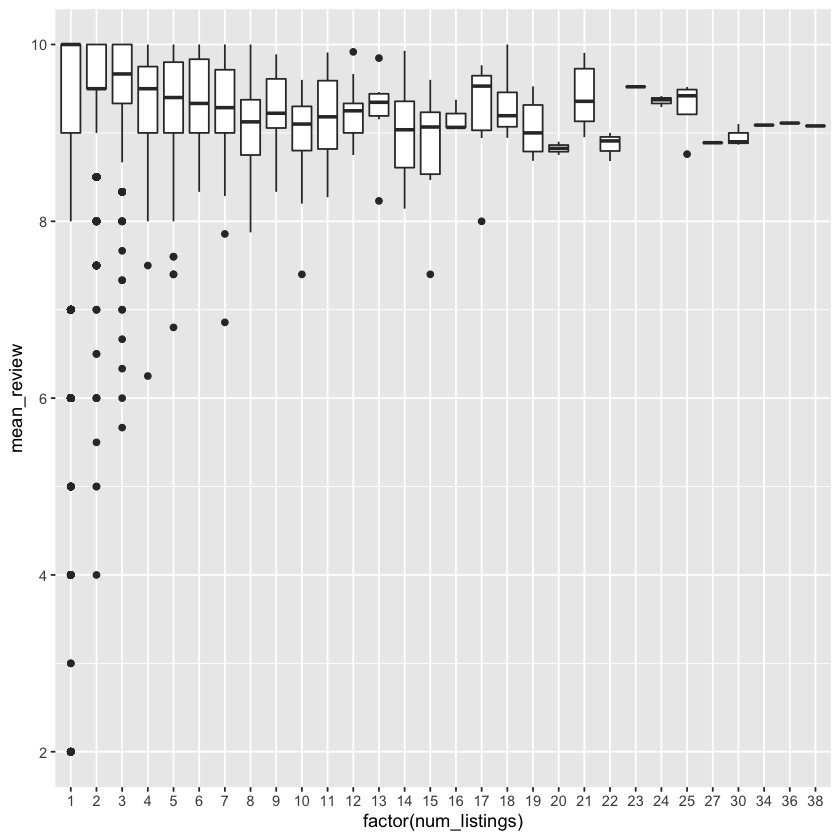

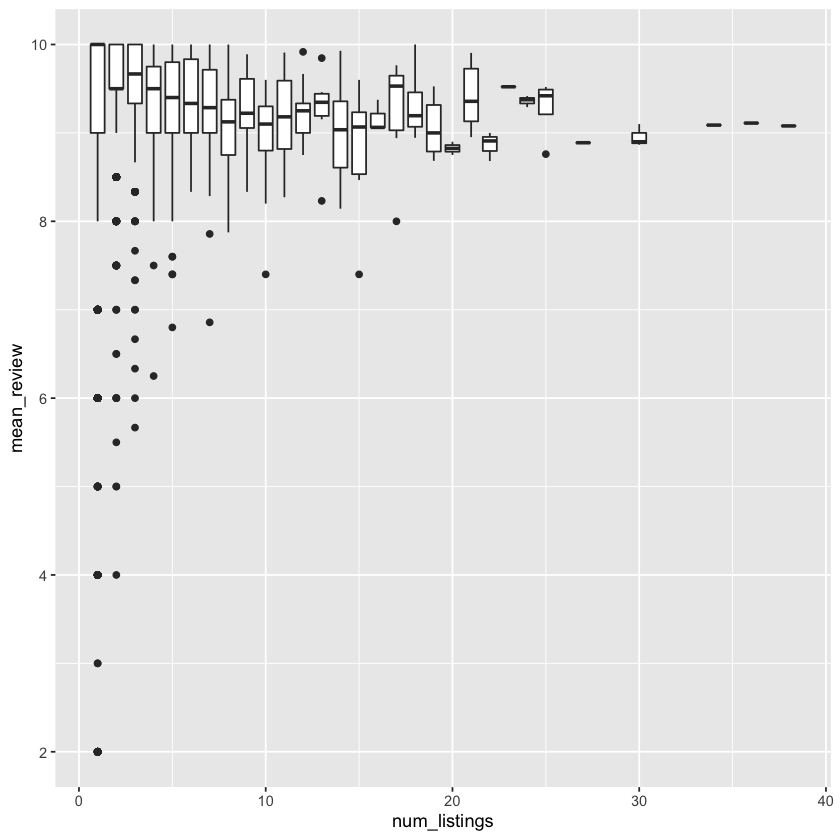

In [15]:
ggplot(hosts, aes(x=factor(num_listings), y=mean_review)) + 
    geom_boxplot()

ggplot(hosts, aes(x=num_listings, y=mean_review, group=num_listings)) + 
    geom_boxplot()


### Step 3:
Let's define commercial hosts to be hosts with >= 5 listings. Create a table called `listing2` that is `listing` with an extra column called `commer_host` indicating if this listing is by a commercial host. 

Hint: You can do this using the `listing` dataset with a single `group_by` and a single `mutate` command.

In [16]:
listing2 = listing %>% group_by(host_id) %>% 
    mutate(commer_host = n_distinct(id) >= 5)

head(listing2)

accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,⋯,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,commer_host
<dbl>,<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>
2,{},29,1,Real Bed,1,1,flexible,palmdale,NA,⋯,10,10,9,93,9,Private room,CA,,93550,FALSE
2,"{""Wireless Internet"",""Air conditioning"",""Wheelchair accessible"",Kitchen,""Free parking on premises"",""Pets allowed"",""Pets live on this property"",Heating,Washer,Dryer,Essentials,Shampoo,Hangers}",18,1,Real Bed,1,1,flexible,acton,NA,⋯,10,10,10,100,10,Private room,CA,,93510,FALSE
6,"{TV,""Wireless Internet"",""Air conditioning"",Pool,Kitchen,""Free parking on premises"",""Pets allowed"",Breakfast,""Pets live on this property"",Dog(s),""Hot tub"",""Indoor fireplace"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",Essentials,Shampoo,""24-hour check-in"",Hangers}",3,1,Real Bed,1,3,flexible,acton,NA,⋯,10,10,10,100,10,Entire home/apt,CA,,93510,FALSE
1,"{Internet,""Wireless Internet"",Kitchen,""Free parking on premises"",Washer,Dryer,""Smoke detector"",Essentials,Shampoo}",0,1,Real Bed,1,1,flexible,los angeles,NA,⋯,9,10,9,93,10,Private room,CA,,90007,FALSE
2,"{Internet,""Wireless Internet"",""Free parking on premises"",""Fire extinguisher"",Essentials,""Lock on bedroom door"",""Laptop friendly workspace"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}",6,1,Real Bed,1,1,moderate,los angeles,NA,⋯,10,10,10,98,10,Private room,CA,,90007,FALSE
2,"{TV,Internet,""Wireless Internet"",Kitchen,Washer,Dryer}",22,NA,Real Bed,1,1,strict,los angeles,NA,⋯,8,9,8,89,9,Private room,CA,$320.00,90007,TRUE


### Step 4:
Using `listing2`, find for each zipcode, the total number of listings, the total number of listings by commercial hosts, and the mean price of all listings in that zipcode. Keep only rows with 50 or more listings. Name this table `zips`, name the four columns `zipcode`, `num_list`, `num_comlist`, and `meanprice`.

In [17]:
zips = listing2 %>% group_by(zipcode) %>% 
    summarize(num_list = n(), 
              num_comlist = sum(commer_host), 
              meanprice = mean(price, na.rm = TRUE)) %>%
    filter(num_list >= 50, zipcode != "")
head(zips)

zipcode,num_list,num_comlist,meanprice
<chr>,<int>,<int>,<dbl>
90004,290,62,115.34028
90005,195,69,90.78351
90006,279,185,60.90323
90007,113,41,59.18584
90012,252,62,124.03175
90013,136,12,146.57353


### Step 5:
In `zips`, add a column indicating if this zipcode is "commercial heavy". We define commercial heavy as zip codes where the number commercial listings exceeds 20% of the total amount of listings.

In [18]:
zips = zips %>% mutate(com_heavy = (num_comlist/num_list) > 0.2)
head(zips)

zipcode,num_list,num_comlist,meanprice,com_heavy
<chr>,<int>,<int>,<dbl>,<lgl>
90004,290,62,115.34028,TRUE
90005,195,69,90.78351,TRUE
90006,279,185,60.90323,TRUE
90007,113,41,59.18584,TRUE
90012,252,62,124.03175,TRUE
90013,136,12,146.57353,FALSE


### Step 6:
Merge the data in `demo` into `zips`. Name this table `zips_withdemo`.

In [19]:
zips_withdemo = zips %>% left_join(demo)
head(zips_withdemo)

Joining, by = "zipcode"



zipcode,num_list,num_comlist,meanprice,com_heavy,population,median_household_income,mean_household_income
<chr>,<int>,<int>,<dbl>,<lgl>,<int>,<dbl>,<dbl>
90004,290,62,115.34028,TRUE,64008,40612,72532
90005,195,69,90.78351,TRUE,38979,31142,45224
90006,279,185,60.90323,TRUE,61625,31521,39123
90007,113,41,59.18584,TRUE,43426,22304,33382
90012,252,62,124.03175,TRUE,30860,31576,52569
90013,136,12,146.57353,FALSE,11299,19887,53527


### Step 7:
Create a scatter plot of mean price vs median household income with `zips_withdemo`. Color points by if this zipcode is commercial heavy. Add a smoothing line. What do you see? What do you learn from this plot?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



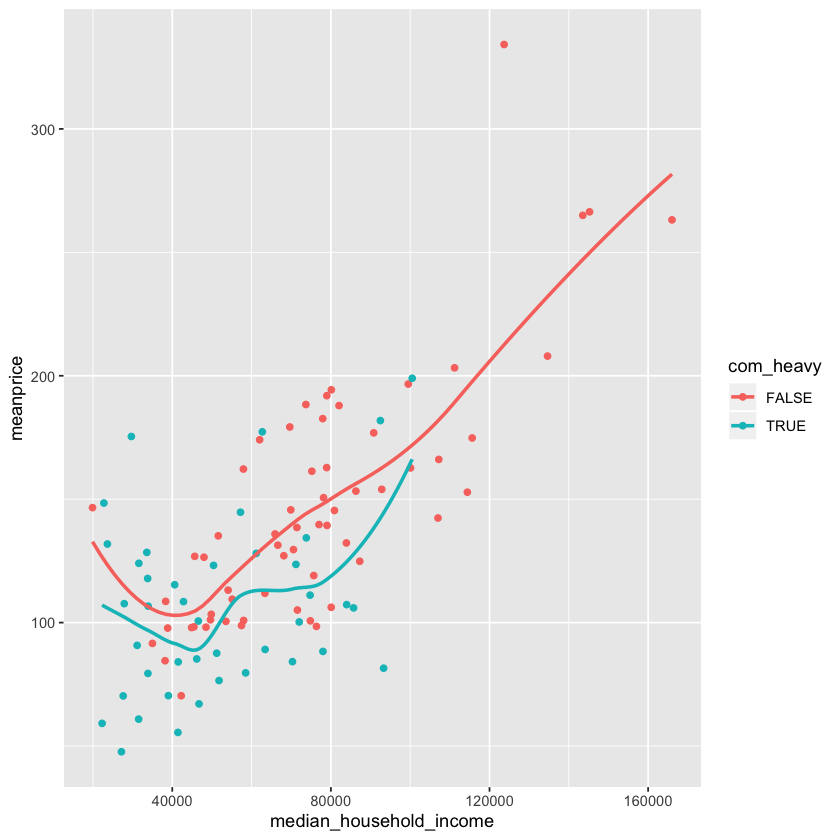

In [20]:
ggplot(zips_withdemo, aes(x=median_household_income, y=meanprice, color=com_heavy)) + 
    geom_point() + geom_smooth(se=FALSE)